In [127]:
import os

import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups
from pyproj import CRS

from shapely.geometry import Point
from geopandas.tools import geocode
import matplotlib.pyplot as plt

import mapclassify

In [104]:
zurich_pop = ["..", "data","Zurich", "population.shp"]
zurich_json = ["..", "data","Zurich", "border.geojson"]

zurich_file = os.path.join(*zurich_pop)
zurich_borders = os.path.join(*zurich_json)

zurich = gpd.read_file(zurich_file)
zurichBorders = gpd.read_file(zurich_borders, )

In [105]:
zurichBorders.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [106]:
zurich.crs = CRS.from_epsg(2056).to_wkt()

In [107]:
zurichBorders2056 = zurichBorders.to_crs(zurich.crs)

In [40]:
zurichBorders2056.crs

<Projected CRS: EPSG:2056>
Name: CH1903+ / LV95
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Liechtenstein; Switzerland.
- bounds: (5.96, 45.82, 10.49, 47.81)
Coordinate Operation:
- name: Swiss Oblique Mercator 1995
- method: Hotine Oblique Mercator (variant B)
Datum: CH1903+
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [41]:
zurich.crs

<Projected CRS: EPSG:2056>
Name: CH1903+ / LV95
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Liechtenstein; Switzerland.
- bounds: (5.96, 45.82, 10.49, 47.81)
Coordinate Operation:
- name: Swiss Oblique Mercator 1995
- method: Hotine Oblique Mercator (variant B)
Datum: CH1903+
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [43]:
zurich.head()

,pop_swiss,pop_foreig,pop_total,income,ID,geometry
0,40.0,0.0,40.0,1.305799e+06,66712490.0,"POLYGON ((2667100.075 1248999.585, 2667100.075..."
1,27.0,4.0,31.0,1.228447e+06,66832465.0,"POLYGON ((2668300.072 1246499.578, 2668300.072..."
2,77.0,48.0,125.0,4.331641e+06,66792443.0,"POLYGON ((2667900.083 1244299.570, 2667900.083..."
3,15.0,20.0,35.0,1.212859e+06,66812444.0,"POLYGON ((2668100.081 1244399.570, 2668100.081..."
4,35.0,3.0,36.0,1.743767e+06,66952470.0,"POLYGON ((2669500.060 1246999.580, 2669500.059..."


In [44]:
zurichBorders2056.head()

,perimeter,gemflaeche,label,objektart,kanton,gemname,geometry
0,58637.008623,9188.0,Zürich,0,ZH,Zürich,"MULTIPOLYGON (((2685650.008 1252755.339, 26856..."


In [46]:
zurichWithin = zurichBorders2056.within(zurich)

/opt/conda/lib/python3.8/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


In [47]:
train_stations = [
      "Bahnhof Wiedikon",
      "Bahnhof Wipkingen",
      "Bahnhof Wollishofen",
      "Bahnhof Altstetten",
      "Bahnhof Enge",
      "Bahnhof Zürich Flughafen",
      "Bahnhof Oerlikon",
      "Bahnhof Stadelhofen",
      "Bahnhof Affoltern",
      "Bahnhof Tiefenbrunnen",
      "Bahnhof Zürich HB"
   ]

In [108]:
geo = geocode(train_stations, provider="nominatim", user_agent="gis-training-manan", timeout=3).to_crs(zurich.crs)

In [110]:
geo.head()

,geometry,address
0,POINT (2681960.757 1247277.681),"Bahnhof Wiedikon, Werd, Aussersihl, Zürich, Be..."
1,POINT (2682390.068 1249730.938),"Bahnhof Wipkingen, Nordbrücke, Wipkingen, Krei..."
2,POINT (2682719.126 1244704.118),"Bahnhof Wollishofen, Staubstrasse, Wollishofen..."
3,POINT (2679340.650 1249338.778),"Bahnhof Altstetten, Werdwies, Altstetten, Krei..."
4,POINT (2682506.278 1246509.243),"Bahnhof Enge, Seestrasse, Enge, Kreis 2, Züric..."


<AxesSubplot:>

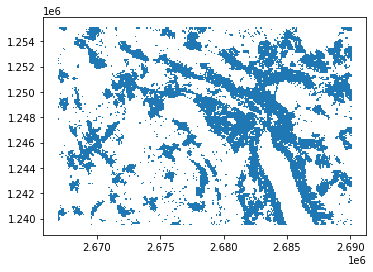

In [111]:
zurich.plot()

<AxesSubplot:>

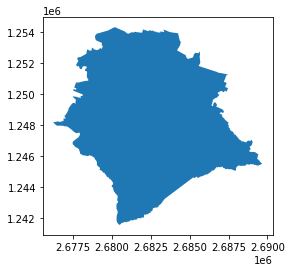

In [112]:
zurichBorders2056.plot()


<AxesSubplot:>

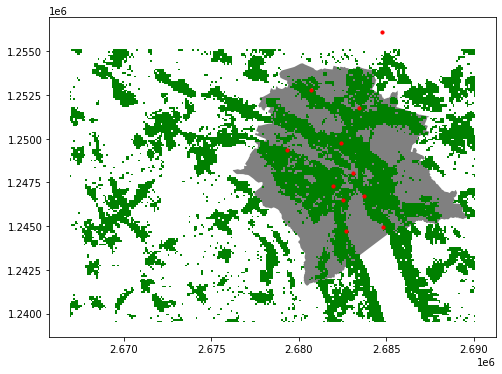

In [93]:
fig,ax = plt.subplots(figsize=(8,12))

zurichBorders2056.plot(ax = ax, facecolor = "gray")
zurich.plot(ax = ax, facecolor = "green")


geo.plot(ax = ax, color="red", markersize=10)

In [101]:
zurich_filter = geo.within(zurichBorders2056.at[0, "geometry"])
geo_filter = geo[zurich_filter]

<AxesSubplot:>

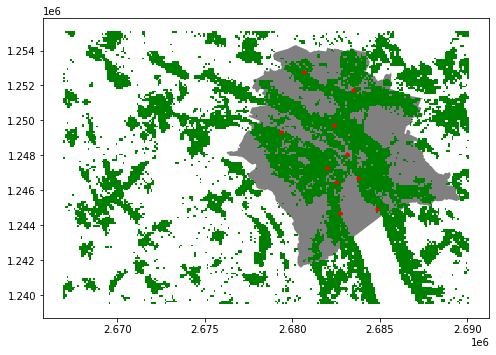

In [102]:
fig,ax = plt.subplots(figsize=(8,12))

zurichBorders2056.plot(ax = ax, facecolor = "gray")
zurich.plot(ax = ax, facecolor = "green")

geo_filter.plot(ax = ax, color="red", markersize=10)

In [188]:
buffered_stations = geo_filter.buffer(2000)


In [137]:
zurich.head()

,pop_swiss,pop_foreig,pop_total,income,ID,geometry
0,40.0,0.0,40.0,1.305799e+06,66712490.0,"POLYGON ((2667100.075 1248999.585, 2667100.075..."
1,27.0,4.0,31.0,1.228447e+06,66832465.0,"POLYGON ((2668300.072 1246499.578, 2668300.072..."
2,77.0,48.0,125.0,4.331641e+06,66792443.0,"POLYGON ((2667900.083 1244299.570, 2667900.083..."
3,15.0,20.0,35.0,1.212859e+06,66812444.0,"POLYGON ((2668100.081 1244399.570, 2668100.081..."
4,35.0,3.0,36.0,1.743767e+06,66952470.0,"POLYGON ((2669500.060 1246999.580, 2669500.059..."


In [176]:
buffered_gpd = gpd.GeoDataFrame(geometry=gpd.GeoSeries(buffered_stations))
joined = gpd.sjoin(zurich,buffered_gpd, how="inner", op="within")
joined.head()

#popTotalClassifier = mapclassify.NaturalBreaks(y=joined['pop_total'])
#popTotalClassifier

,pop_swiss,pop_foreig,pop_total,income,ID,geometry,index_right
24,94.0,30.0,124.0,5.146663e+06,68022466.0,"POLYGON ((2680199.974 1246599.597, 2680199.974...",0
26,36.0,29.0,65.0,2.697848e+06,68002469.0,"POLYGON ((2679999.974 1246899.598, 2679999.974...",0
30,99.0,59.0,158.0,6.557845e+06,68072469.0,"POLYGON ((2680699.969 1246899.599, 2680699.969...",0
31,125.0,99.0,224.0,9.297198e+06,68072486.0,"POLYGON ((2680699.960 1248599.606, 2680699.959...",0
32,56.0,3.0,58.0,2.407310e+06,68112458.0,"POLYGON ((2681099.972 1245799.596, 2681099.972...",0


<AxesSubplot:>

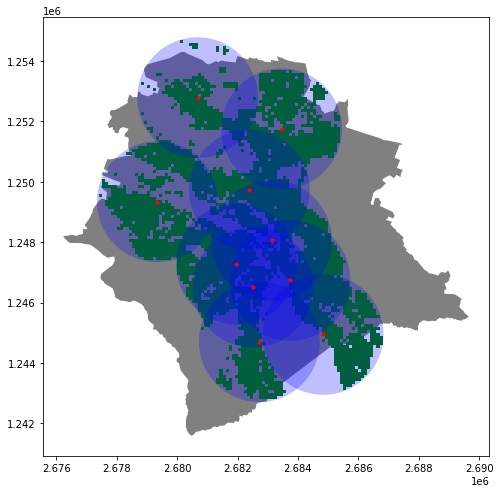

In [187]:
fig,ax = plt.subplots(figsize=(8,12))

zurichBorders2056.plot(ax = ax, facecolor = "gray")
joined.plot(ax = ax, facecolor = "green", legend=True)
#joined.inverse.plot(ax = ax, facecolor = "black", legend=True)
buffered_stations.plot(ax = ax, facecolor = "blue", alpha=0.25)

geo_filter.plot(ax = ax, color="red", markersize=10)

In [193]:
buffered_gpd = gpd.GeoDataFrame(geometry=gpd.GeoSeries(buffered_stations))
joined = gpd.sjoin(zurich,buffered_gpd, how="inner", op="intersects")
joined.head()

,pop_swiss,pop_foreig,pop_total,income,ID,geometry,index_right
23,30.0,7.0,37.0,1.535698e+06,67892513.0,"POLYGON ((2678899.958 1251299.612, 2678899.957...",3
25,84.0,29.0,113.0,4.690104e+06,67952474.0,"POLYGON ((2679499.975 1247399.598, 2679499.975...",3
27,3.0,0.0,3.0,1.245160e+05,67932480.0,"POLYGON ((2679299.974 1247999.600, 2679299.973...",3
29,8.0,15.0,23.0,9.546230e+05,67912488.0,"POLYGON ((2679099.971 1248799.603, 2679099.970...",3
31,125.0,99.0,224.0,9.297198e+06,68072486.0,"POLYGON ((2680699.960 1248599.606, 2680699.959...",3


<AxesSubplot:>

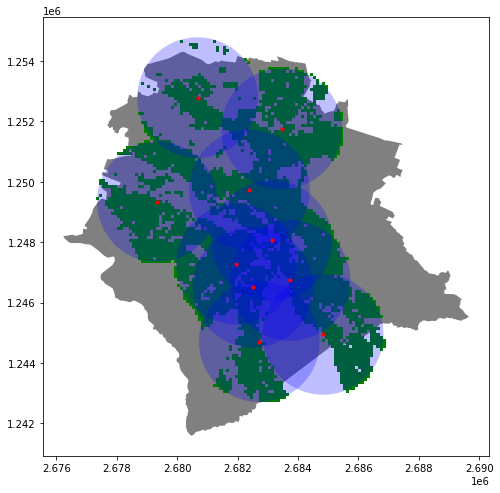

In [192]:
fig,ax = plt.subplots(figsize=(8,12))

zurichBorders2056.plot(ax = ax, facecolor = "gray")
joined.plot(ax = ax, facecolor = "green", legend=True)
#joined.inverse.plot(ax = ax, facecolor = "black", legend=True)
buffered_stations.plot(ax = ax, facecolor = "blue", alpha=0.25)

geo_filter.plot(ax = ax, color="red", markersize=10)